# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


In [120]:
# importing important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the dataset

In [121]:
bike_df = pd.read_csv('/content/drive/MyDrive/UpGrad/Graded /Assignement/Bike Sharing/day.csv')

In [122]:
bike_df.shape

(730, 16)

In [123]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [124]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [125]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [126]:
# Handle Missing Value
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [127]:
# Dropping dteday as we have already have month and weekday columns
# Dropping casual and registered columns (cnt= casual + registered)
bike_df.drop(['dteday'], axis = 1, inplace = True)
bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)

# Converting numerical to categorical variable based on dictionary and its meaning
**weathersit:**

*   1: Clear, Few clouds, Partly cloudy, Partly cloudy
*   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**season:**
*   season (1:spring, 2:summer, 3:fall, 4:winter)

**weekday:**
*   weekday (0:sun,1:mon,2:tue,3:wed,4:thu,5:fri,6:sat)

**month:**
*   mnth ({1:jan,2:feb,3:mar,4:apr,5:may,6:june,7:july,8:aug,9:sep,10:oct,11:nov,12:dec}))



In [128]:
# Converting numerical variable to categorical variable based on dictionary

bike_df['weathersit']= bike_df['weathersit'].map({1:'Clear',2:'cloudy',3:'thunderstorm',4:'heavy_rain'})
bike_df['season']= bike_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_df['mnth'] = bike_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df['weekday'] = bike_df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [129]:
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [130]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


**Visualizing the Bike Sharing Dataset**

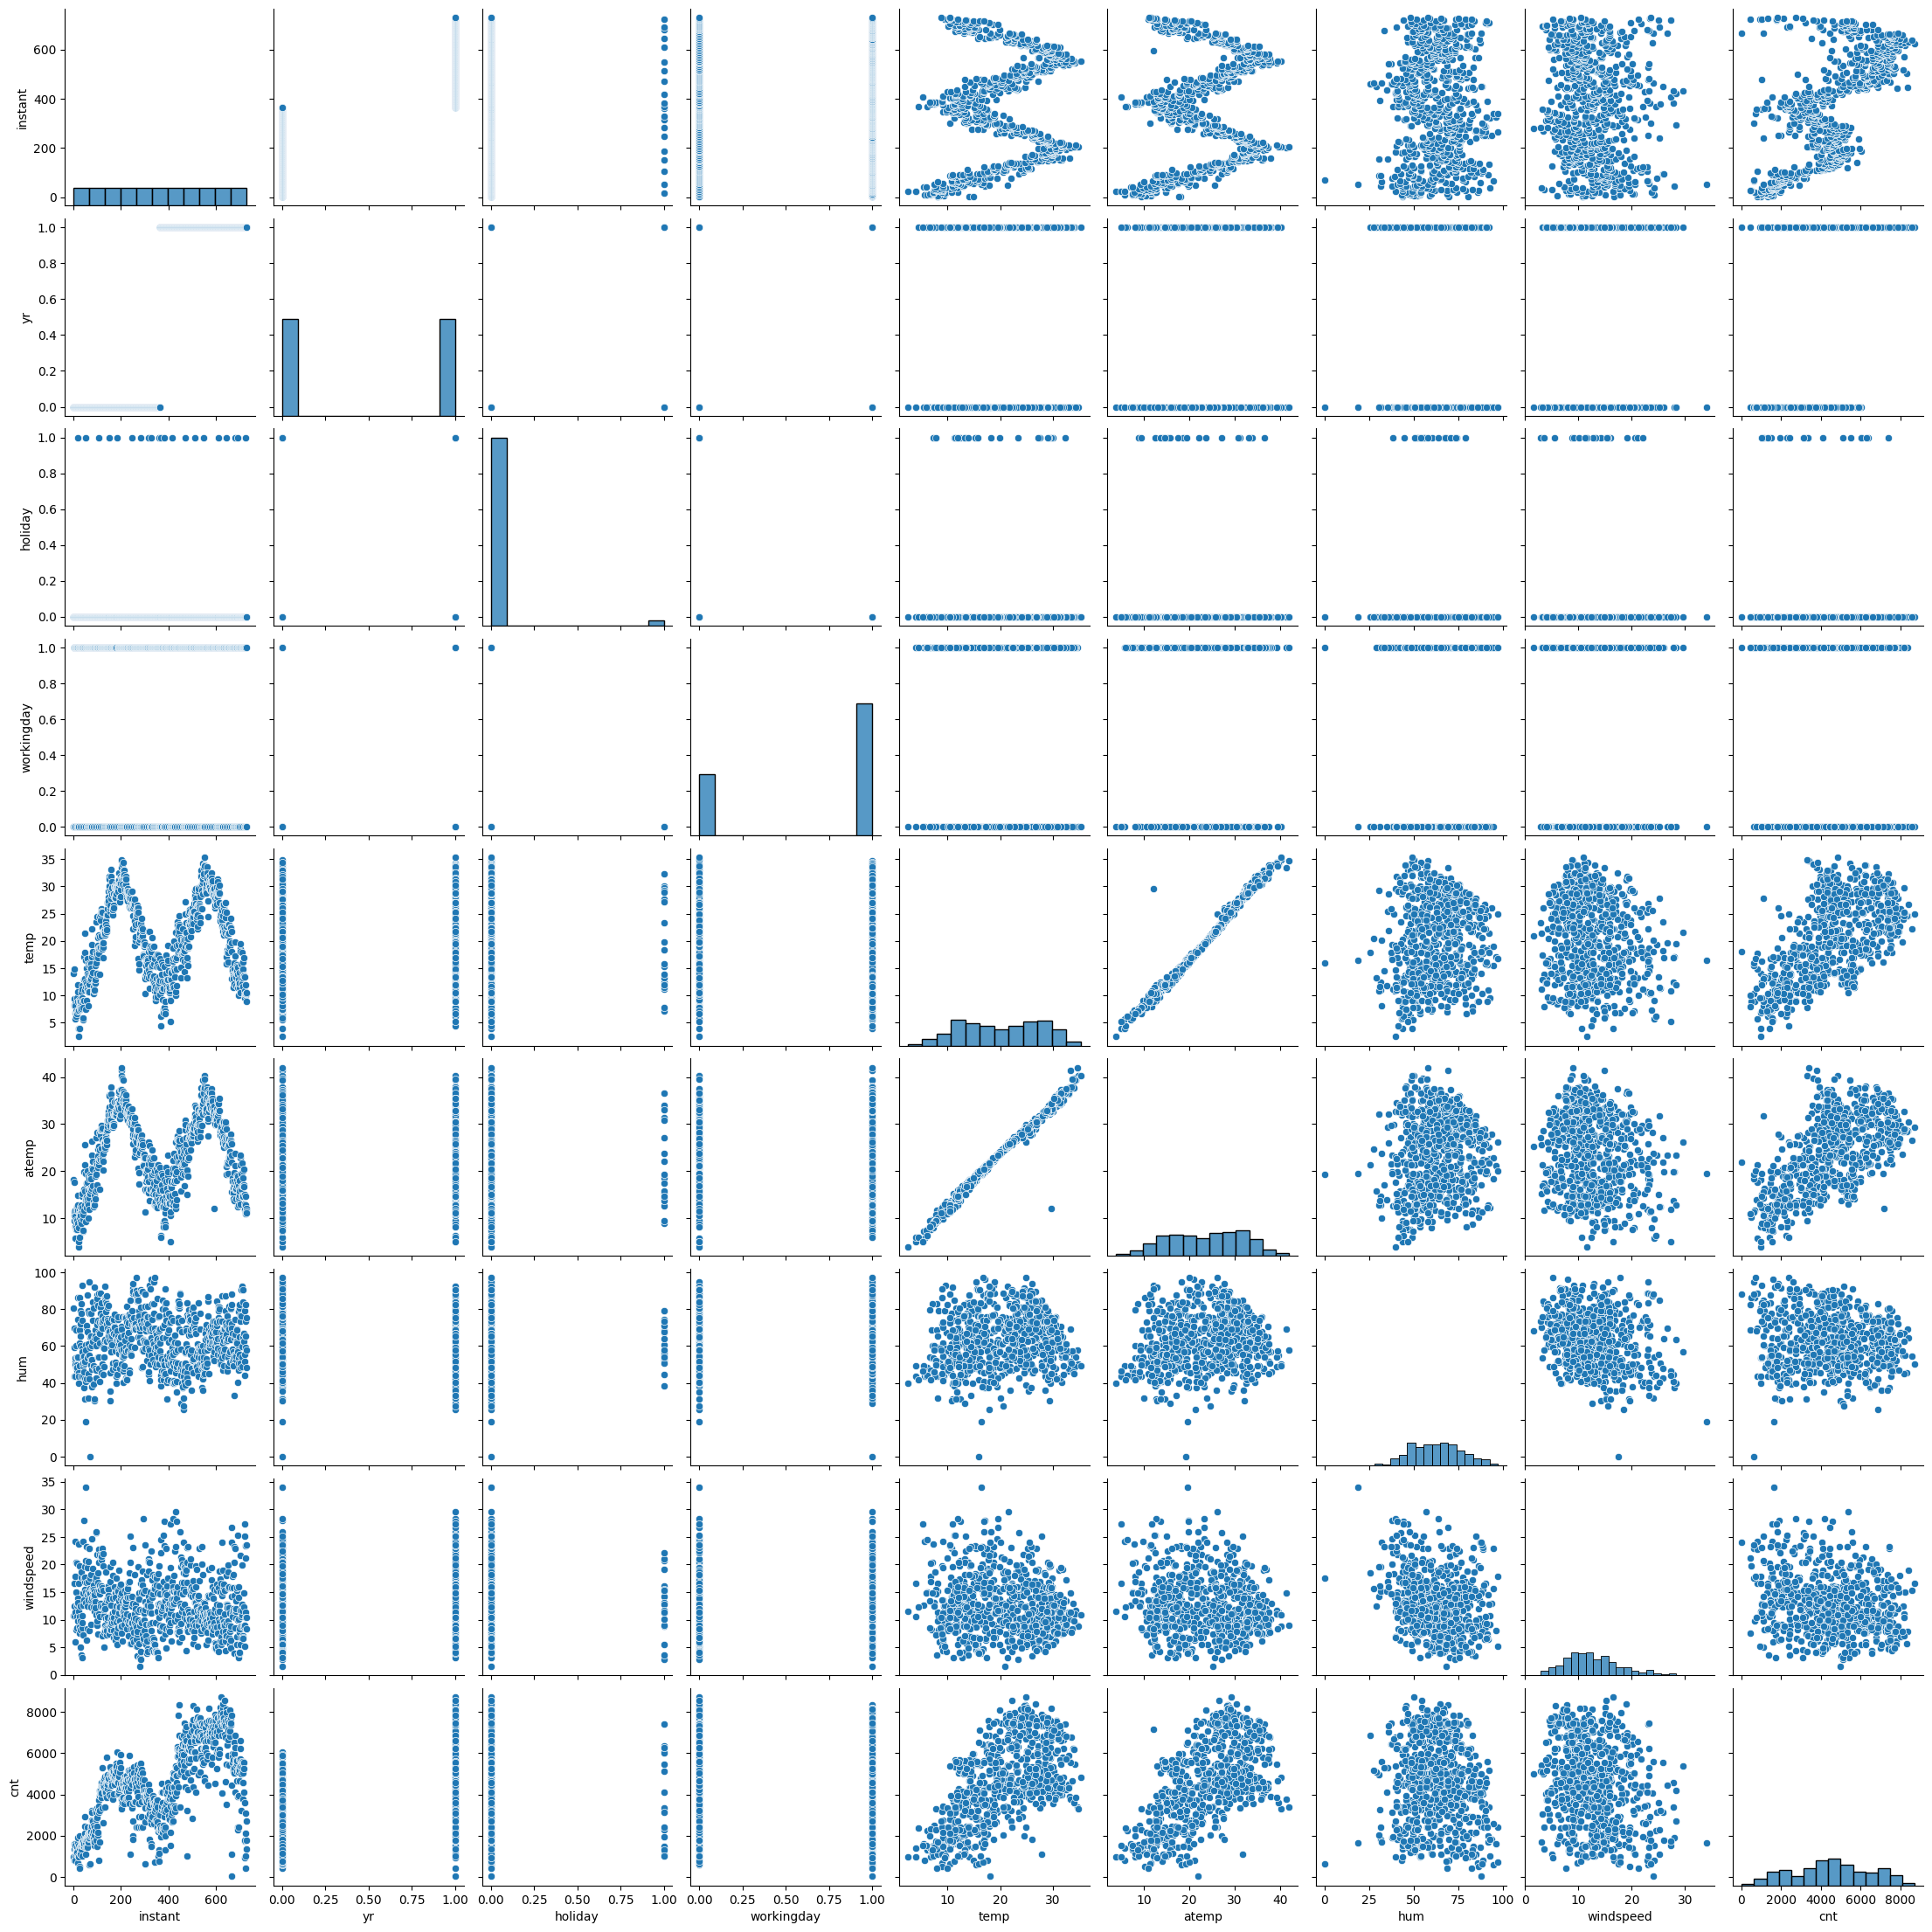

In [131]:
sns.pairplot(bike_df)

**Findings**

*   Target variable (cnt) has linear relationship with other variables like temp, atemp etc.
*   Seems like a high correlation exist between cnt and other independent variable (temp, atemp, hum etc.)



In [132]:
bike_df.corr()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.629896
yr,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.016080,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.629896,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


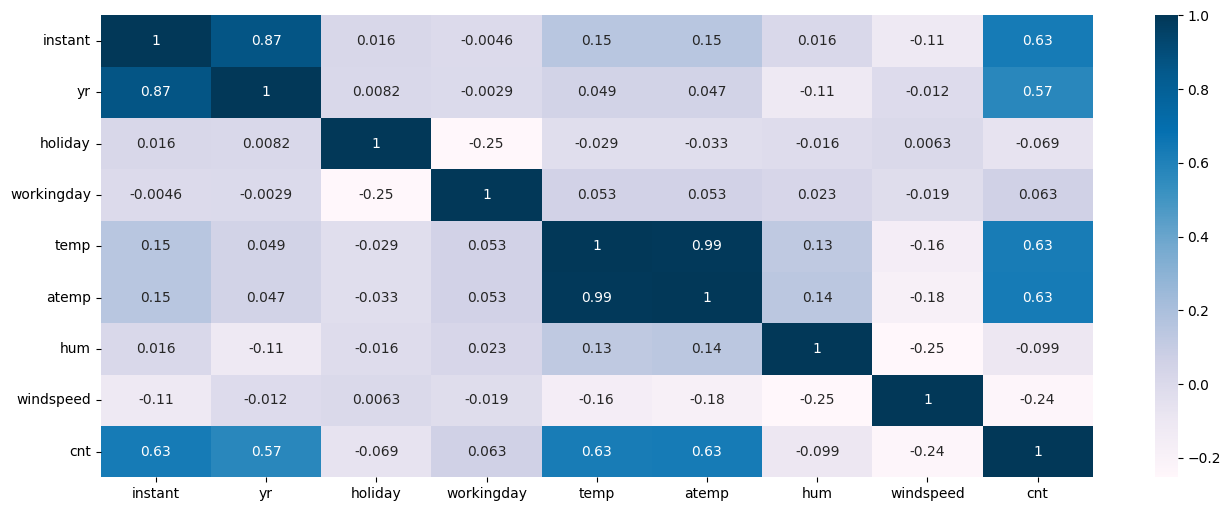

In [133]:
plt.figure(figsize=(16,6))
sns.heatmap(bike_df.corr(), annot= True, cmap = "PuBu")
plt.show()

**Findings**
*   Dependent variable(cnt) is highly correlated with yr,temp,atemp & instant. We will focus on these varibale for builing the model and also keep an eye on VIF to improve our model
*   We see some independent variable are correlated with each other such as yr & instant, temp & atemp



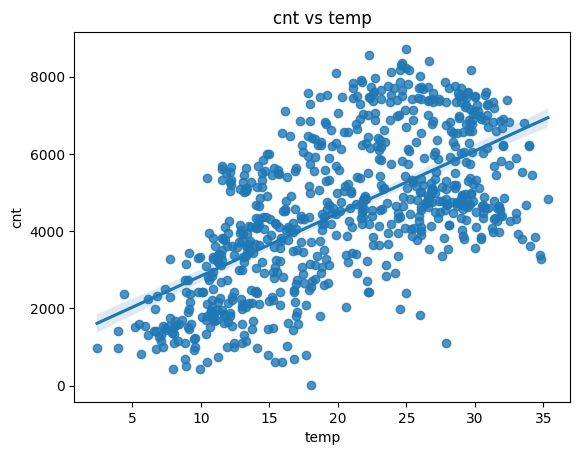

In [134]:
sns.regplot(x = 'temp', y = 'cnt', data = bike_df)
plt.title("cnt vs temp")
plt.show()

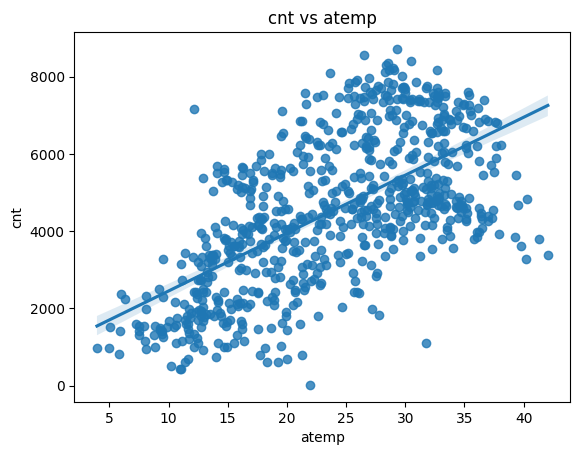

In [135]:
sns.regplot(x = 'atemp', y = 'cnt', data = bike_df)
plt.title("cnt vs atemp")
plt.show()

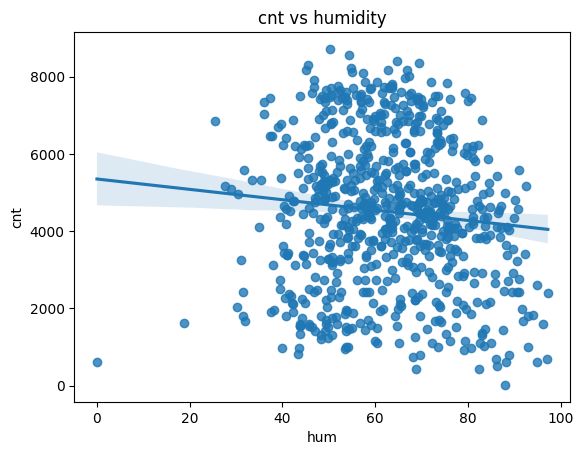

In [136]:
sns.regplot(x = 'hum', y = 'cnt', data = bike_df)
plt.title("cnt vs humidity")
plt.show()

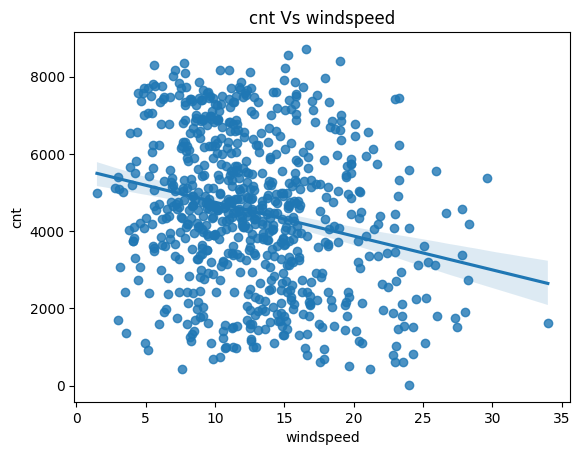

In [137]:
sns.regplot(x = 'windspeed', y = 'cnt', data = bike_df)
plt.title("cnt Vs windspeed")
plt.show()

**Findings**

*   cnt increses with increase in temp
*   cnt increses with increase in atemp
*   cnt decreases with increase in humidity
*   cnt decreases with increase in windspeed



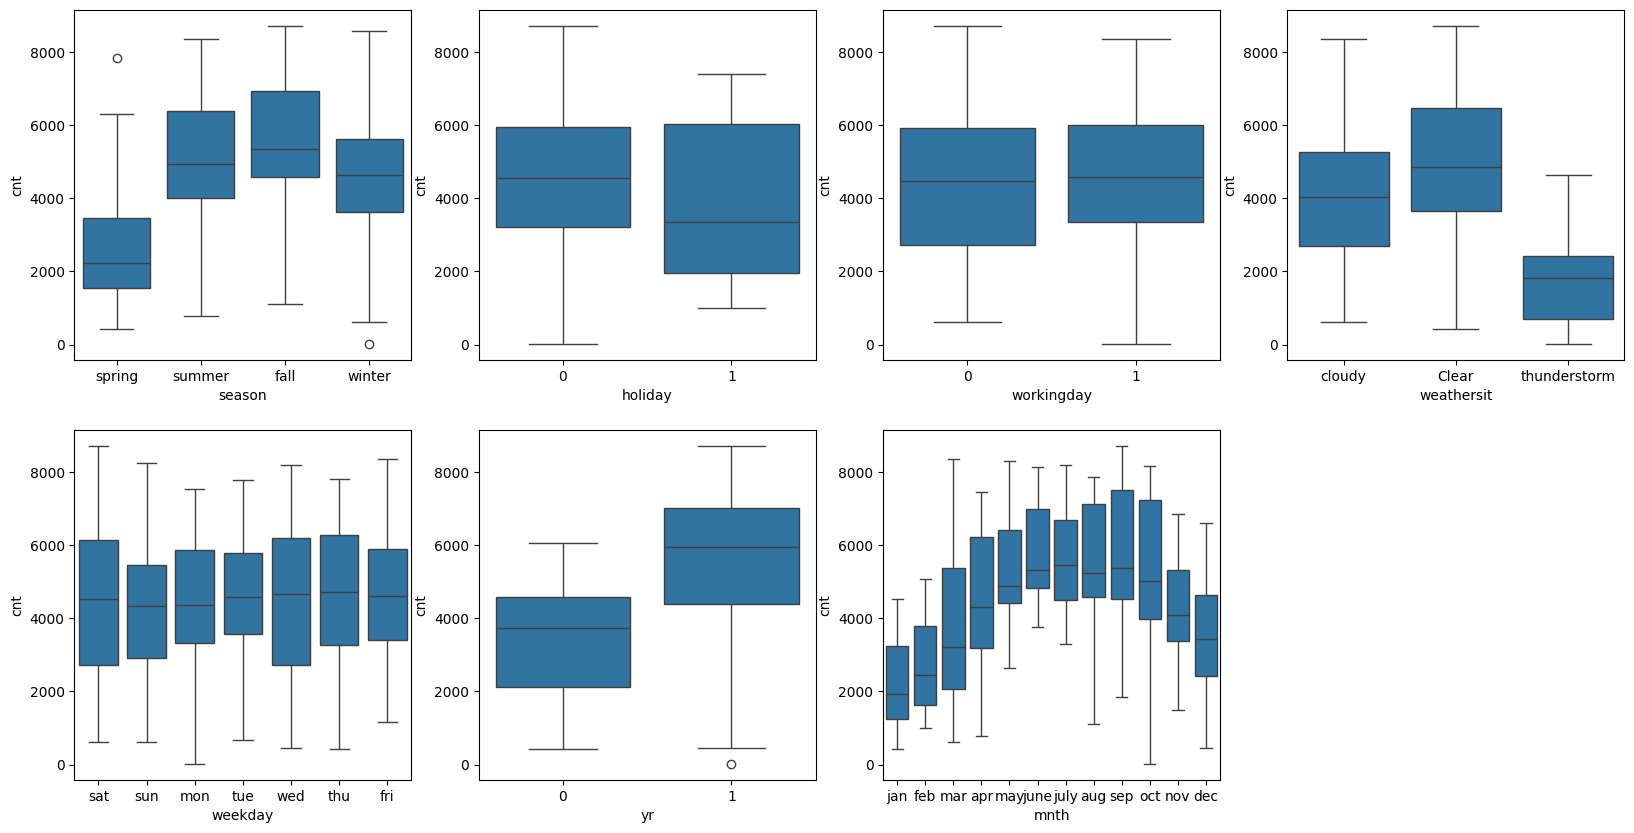

In [138]:
# Box plot to visualize categorical variables
plt.figure(figsize = (20,10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df )
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df )
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df )
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df )
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df )
plt.subplot(2,4,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df )
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df )
plt.show()

**Findings**
*   season 3 i.e "fall" has highest demand for the bikes
*   On holidays demand has decreased
*   When the weather is clear, bikes demand rises
*   Demand of bike sharing has increased over the years (2019>2018)
*   Bike demand is continuously growing each month till June. September has highest demand. After September demand decreases




# Data Preparation for Linear Regression Model

In [139]:
# Dummy variable creation for month, weekday, weathersit and season variables

months=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons=pd.get_dummies(bike_df.season,drop_first=True)

In [140]:
#  Concatenating dummy varibale with the bike dataframe
bike_df= pd.concat([bike_df,months,weekdays,weathersit,seasons], axis = 1)

In [141]:
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,sat,sun,thu,tue,wed,cloudy,thunderstorm,spring,summer,winter
0,1,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,...,1,0,0,0,0,1,0,1,0,0
1,2,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,...,0,1,0,0,0,1,0,1,0,0
2,3,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,0,0,0,0,0,1,0,0
3,4,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,1,0,0,0,1,0,0
4,5,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,1,0,0,1,0,0


In [142]:
# Drop redundant varibale as we already created dummy varible for it
bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [143]:
bike_df.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,...,sat,sun,thu,tue,wed,cloudy,thunderstorm,spring,summer,winter
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,1,0,0,0,0,1,0,1,0,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,1,0,0,0,1,0,1,0,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,1,0,0,1,0,0


In [144]:
bike_df.shape

(730, 31)

# Model Building


In [145]:
# Splitting the dataset into train and test
train_df, test_df= train_test_split(bike_df,train_size=0.7, random_state=100)
print("train shape: ",train_df.shape)
print("test shape: ", test_df.shape)

train shape:  (510, 31)
test shape:  (220, 31)


In [146]:
# Intantite the object
scaler = MinMaxScaler()

# Variable list that needs to be scaled
numeric_var=['cnt','temp','atemp','hum','windspeed']

# fit and transform
train_df[numeric_var]=scaler.fit_transform(train_df[numeric_var])

In [147]:
# Seperating dependent variable from independent one's
y_train = train_df.pop ('cnt')
X_train = train_df

In [148]:
X_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,...,sat,sun,thu,tue,wed,cloudy,thunderstorm,spring,summer,winter
576,577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0
426,427,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,1,0,0,0,0,1,0,1,0,0
728,729,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,...,0,1,0,0,0,0,0,1,0,0
482,483,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,...,1,0,0,0,0,1,0,0,1,0
111,112,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,...,0,0,0,0,0,1,0,0,1,0


**Remove Variable using automated approach (RFE)**

In [149]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [150]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 16),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('cloudy', True, 1),
 ('thunderstorm', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [151]:
# columns selected after RFE
X=X_train.columns[rfe.support_]
X

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'cloudy', 'thunderstorm', 'spring', 'summer',
       'winter'],
      dtype='object')

In [152]:
# Columns rejected after RFE
X_train.columns[~rfe.support_]

Index(['instant', 'atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov',
       'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [153]:
X_train_rfe= X_train[X]

**Model 1: Building model using the variables selected by RFE**

In [154]:
# Define a function to build stats model
def stats_model(X):
    X_train_sm = sm.add_constant(X_train[X])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [155]:
stats_model(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          4.22e-191
Time:                        09:49:33   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2519      0.036      6.969   

**Remove variable using using VIF**

We will check two things to remove the varaible
*   significane i.e p value
*   VIF



In [156]:
# Define a function to check multicollinearity using VIF
def calculate_vif(X):
  VIF_df = pd.DataFrame()
  VIF_df['Features'] = X.columns
  VIF_df['VIF']= [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
  VIF_df['VIF']= round(VIF_df['VIF'],2)
  VIF_df = VIF_df.sort_values(by='VIF', ascending = False)
  return VIF_df

In [157]:
# VIF
calculate_vif(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
10,cloudy,2.29
0,yr,2.09
9,sat,1.98


**Metric to be followed in deciding which variable to remove first**

1.   High p-value and High VIF
2.   High P-value and Low VIF
3.   High VIF and Low P-value
4.   Low P-value and Low VIF (keep it)



**Model 2: Building model after removing humidity which has high VIF**

In [158]:
X= X_train_rfe.drop(['hum'], axis = 1).columns

# Call the function to calculate VIF for the new model
calculate_vif(X_train[X])

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [159]:
# Model 2 summary
stats_model(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          1.60e-188
Time:                        09:49:33   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1737      0.031      5.520   

**Model 3: Building model after removing month jan which has negative coef and high p-value**

In [160]:
X= X_train_rfe.drop(['hum','jan'], axis = 1).columns

# Call the function to calculate VIF for the new model
calculate_vif(X_train[X])

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,yr,2.07
12,winter,1.98
7,sat,1.96
5,july,1.58
8,cloudy,1.57


In [161]:
# Model 3 summary
stats_model(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          1.28e-188
Time:                        09:49:33   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1576      0.031      5.126   

**Model 4: Building model after removing month july which has negative coef and high p-value**

In [162]:
X= X_train_rfe.drop(['july','hum','jan'], axis = 1).columns

# Call the function to calculate VIF for the new model
calculate_vif(X_train[X])

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
9,spring,2.40
0,yr,2.07
10,summer,2.01
6,sat,1.96
11,winter,1.83
7,cloudy,1.57
5,sep,1.24


In [163]:
# Model 4 summary
stats_model(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          3.16e-188
Time:                        09:49:33   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1484      0.031      4.827   

**Inferences**


*   VIF is low so we can accept Model 4. p-value is almost 0.0 and R2 is 0.839
*   Model 4 has very low multicolinearity between the predictors
*   F-Statistics value of 215.7 and the p-value of 3.16e-188, shows that overall model 4 is significant
* Difference between R-squared and Adjusted R-squared is less, shows model 4 is good.

# **Model Evaluation**

In [164]:
X_train_sm = sm.add_constant(X_train[X])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

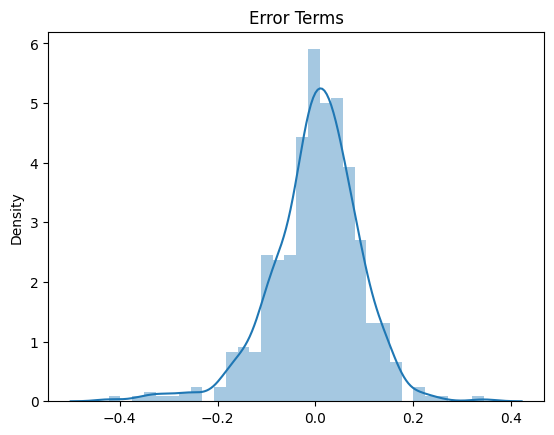

In [165]:
# Residual Analysis
y_train_pred = lr_model.predict(X_train_sm)
err = y_train-y_train_pred
sns.distplot(err)
plt.title("Error Terms")
plt.show()

Text(0.5, 1.0, 'Residual Plot')

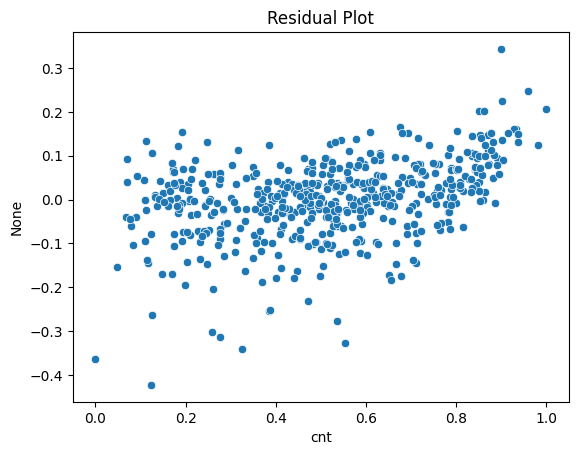

In [166]:
sns.scatterplot(x= y_train, y= err, data= bike_df)
plt.title ("Residual Plot")

**Findings**

*   Error terms follows normal distribution, which shows LR model is good
*   No pattern found in residual plot, which is postive sign for a good model



**Prediction and comparison**

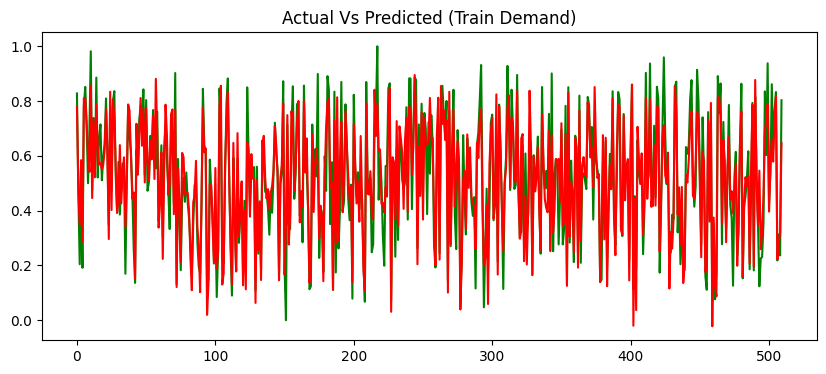

In [167]:
# Plot Actuals Vs Prediction result on Train dataset
plt.figure(figsize=(10,4))
x_axis = [i for i in range(0,len(X_train),1)] # Created a custom list to be used as the x-axis for the plot
plt.plot(x_axis,y_train, color="green")
plt.plot(x_axis,y_train_pred, color="red")
plt.title("Actual Vs Predicted (Train Demand)")
plt.show()

**Findings**

*   Predicted train demand seems to be overlaping with the actuals train demand, which is good sign for the model




**Prediction Result on Test Dataset**

In [168]:
# Scale test value
numeric_var=['cnt','temp','atemp','hum','windspeed']

# fit and transform
test_df[numeric_var]=scaler.transform(test_df[numeric_var])

In [169]:
# Seperating target variable from the predictive variable
y_test = test_df.pop('cnt')
X_test = test_df

In [170]:
# statsmodel doesn't have constant by default
X_test_sm = sm.add_constant(X_test[X])
lr = sm.OLS(y_test,X_test_sm)
# fitting the model using statsmodel
lr_model = lr.fit()

# prediction
y_test_pred = lr_model.predict(X_test_sm)

In [171]:
# R square value for test
round(r2_score(y_true=y_test, y_pred=y_test_pred),2)

0.82

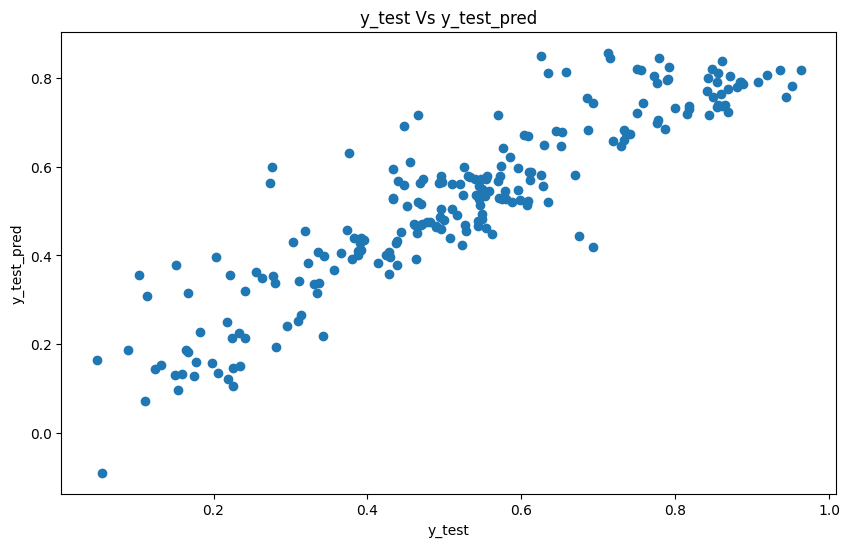

In [172]:
# Plot y_test Vs Y_test_spread
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.title("y_test Vs y_test_pred")
plt.show()

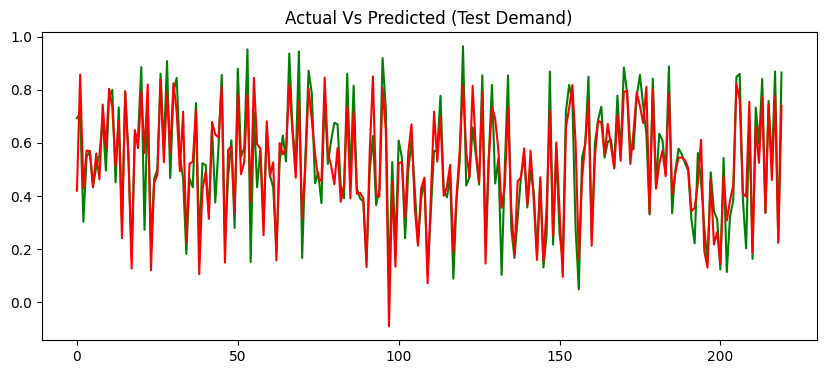

In [173]:
# Plot Actuals Vs Prediction result on test dataset
plt.figure(figsize=(10,4))
x_axis = [i for i in range(0,len(X_test),1)] # Created a custom list to be used as the x-axis for the plot
plt.plot(x_axis,y_test, color="green")
plt.plot(x_axis,y_test_pred, color="red")
plt.title("Actual Vs Predicted (Test Demand)")
plt.show()

**Findings**


*   As the y_test and y_test_pred spread is small, we can say the error term doesn't vary much.

*   Predicted test demand seems to be overlaping with the actuals test demand, which is good sign for the model





In [174]:
# Significant Variables
lr_model.params

const           0.196410
yr              0.242173
holiday        -0.042315
workingday      0.029605
temp            0.403895
windspeed      -0.032039
sep             0.054223
sat             0.043388
cloudy         -0.067347
thunderstorm   -0.249302
spring         -0.129043
summer          0.029604
winter          0.074925
dtype: float64

In [175]:
# Evaluation
r2_score_train = round(r2_score(y_true=y_train, y_pred=y_train_pred),2)
r2_score_test = round(r2_score(y_true=y_test, y_pred=y_test_pred),2)
print("R^2 for train dataset: ",r2_score_train)
print("R^2 for test dataset: ",r2_score_test)

R^2 for train dataset:  0.84
R^2 for test dataset:  0.82


# **Summary**

**Top 3 predictor variable based on their coefficient caluculated using LR Model**


> ***Temperature:*** coeff "0.403895" indicates increase in temperature will increase in bike demand


> ***Weather (thunderstorm or situation 3):*** coeff "-0.249302" indicates increase in situatuion 3 will decrease bike demand


> ***Year:*** coeff "0.242173" indicates increase in year will increase in bike demand




**General Observation**









*   There seems to be jump in bike demand during september, company should come up with more offer to increase demand during sept.
*   It's evident from above analysis that there would be less bookings as weather condition goes severe i.e Rainy, Thunderstorm, Snow etc.
*   As we see rise in users demand from 2018 to 2019,we can expect to see a rise in demand again as situation goes normal.
*   Demand for bike depends on these independent variable significantly i.e  year (2019>2018), holidays, temperature, windspeed, september month, weather (cloudy, thunderstorm) & season (spring, summer, winter).


